In [1]:
# Import necessary libraries
# Your calling code (e.g., in a script or notebook)

from sequenzo import * # Import the package, give it a short alias
import pandas as pd # Data manipulation

# List all the available datasets in Sequenzo
# Now access functions using the alias:
print('Available datasets in Sequenzo: ', list_datasets())

# Load the data that we would like to explore in this tutorial
# `df` is the short for `dataframe`, which is a common variable name for a dataset
# df = load_dataset('country_co2_emissions')
df = load_dataset('country_co2_emissions_local_deciles')

# Show the dataframe
df

Available datasets in Sequenzo:  ['country_co2_emissions_local_quintiles', 'country_co2_emissions_local_deciles', 'polyadic_seqc1', 'polyadic_samplep1', 'mvad', 'chinese_colonial_territories', 'polyadic_samplec1', 'country_gdp_per_capita', 'polyadic_seqp1', 'country_co2_emissions', 'biofam_married_domain', 'country_co2_emissions_global_deciles', 'country_co2_emissions_global_quintiles', 'biofam', 'biofam_left_domain', 'biofam_child_domain']


,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),...,D2,D2,D2,D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low)
1,Albania,D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),...,D5,D5,D5,D5,D5,D5,D5,D5,D5,D5
2,Algeria,D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),...,D6,D6,D6,D6,D6,D6,D6,D6,D6,D6
3,Andorra,D9,D9,D9,D9,D9,D9,D9,D9,D9,...,D7,D7,D8,D8,D8,D8,D8,D8,D8,D8
4,Angola,D5,D5,D5,D5,D5,D5,D5,D5,D5,...,D4,D4,D4,D4,D4,D3,D3,D3,D3,D3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Venezuela,D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),D1 (Very Low),...,D6,D7,D6,D5,D5,D3,D1 (Very Low),D3,D2,D2
190,Vietnam,D6,D6,D6,D6,D6,D6,D6,D6,D6,...,D4,D4,D4,D4,D4,D4,D5,D5,D5,D5
191,Yemen,D2,D2,D2,D2,D2,D2,D2,D2,D2,...,D3,D3,D2,D2,D2,D2,D2,D2,D2,D2
192,Zambia,D9,D9,D9,D9,D9,D9,D9,D9,D9,...,D2,D2,D2,D2,D2,D2,D2,D2,D2,D2


In [2]:
# Create a SequenceData object

# Define the time-span variable
time_list = list(df.columns)[1:]

# states = ['Very Low', 'Low', 'Middle', 'High', 'Very High']
states = ['D1 (Very Low)', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10 (Very High)']

# TODO: write a try and error: if no such a parameter, then ask to pass the right ones
# sequence_data = SequenceData(df, time=time, id_col="country", ids=df['country'].values, states=states)

sequence_data = SequenceData(df, 
                             time=time_list, 
                             id_col="country", 
                             states=states,
                             labels=states)

sequence_data

[!] Detected missing values (empty cells) in the sequence data.
    → Automatically added 'Missing' to `states` and `labels` for compatibility.
    However, it's strongly recommended to manually include it when defining `states` and `labels`.
    For example:

        states = ['At Home', 'Left Home', 'Missing']
        labels = ['At Home', 'Left Home', 'Missing']

    This ensures consistent color mapping and avoids unexpected visualization errors.

[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 194
[>] Number of time points: 223
[>] Min/Max sequence length: 216 / 223
[>] There are 7 missing values across 1 sequences.
    First few missing sequence IDs: ['Panama'] ...
[>] Top sequences with the most missing time points:
    (Each row shows a sequence ID and its number of missing values)

             Missing Count
Sequence ID               
Panama                   7
[>] States: ['D1 (Very Low)', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D

SequenceData(194 sequences, States: ['D1 (Very Low)', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10 (Very High)', 'Missing'])

#### Testing the index plot when sorts are different

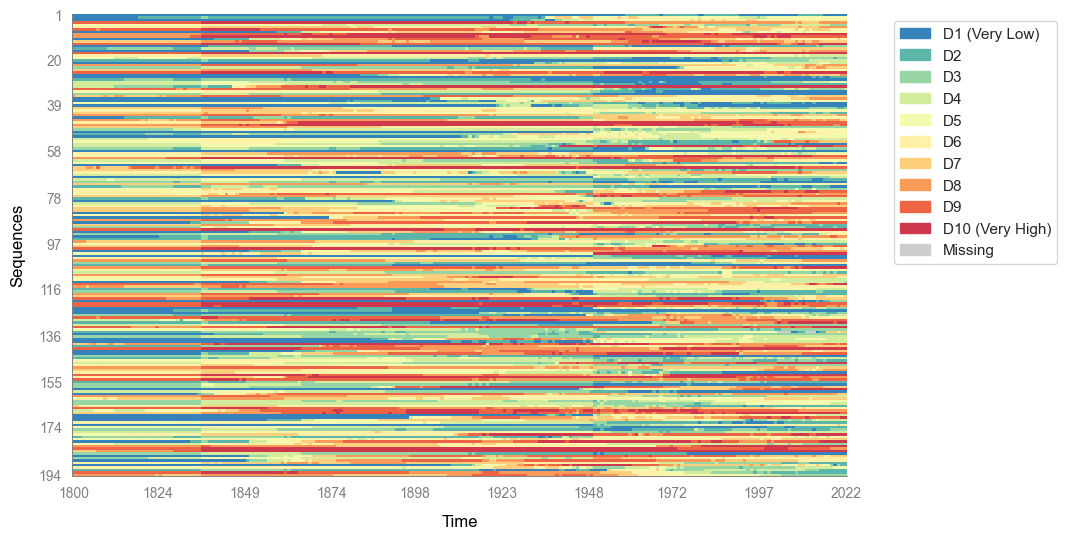

In [12]:
# Plot the index plot

plot_sequence_index(sequence_data, 
                    sort_by="unsorted",
                    # save_as='index_plot'
                    )

[>] Processing 194 sequences with 11 unique states.
  - Creating 12x12 substitution-cost matrix using 2 as constant value
[>] generated an indel of type number

[>] Identified 194 unique sequences.
[>] Starting Optimal Matching(OM)...
[>] Computing all pairwise distances...
[>] Computed Successfully.


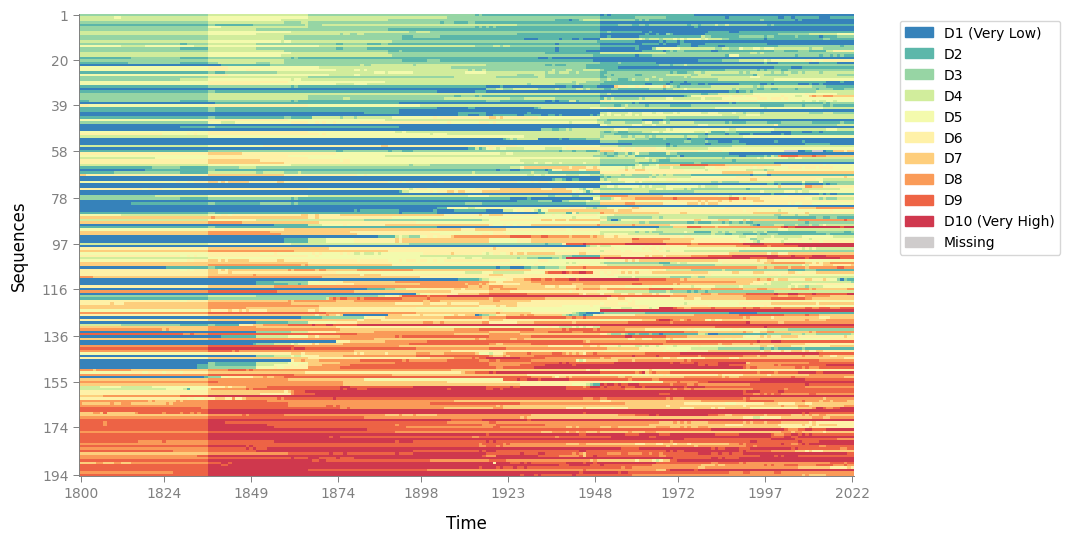

In [3]:
# Plot the index plot

plot_sequence_index(sequence_data, 
                    sort_by="mds",
                    # save_as='index_plot'
                    )

[>] Processing 194 sequences with 11 unique states.
  - Creating 12x12 substitution-cost matrix using 2 as constant value
[>] generated an indel of type number

[>] Identified 194 unique sequences.
[>] Starting Optimal Matching(OM)...
[>] Computing all pairwise distances...
[>] Computed Successfully.


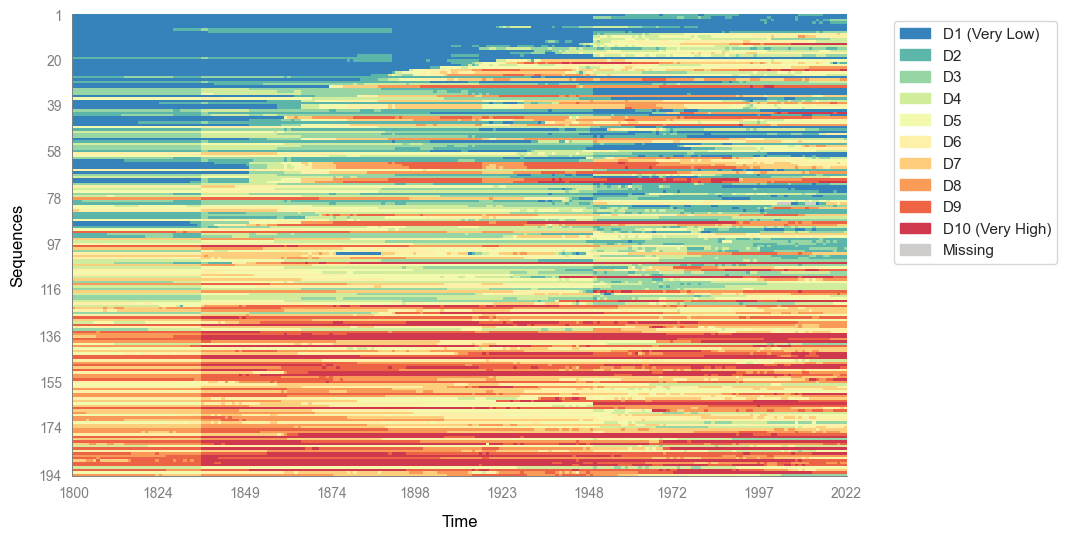

In [13]:
plot_sequence_index(sequence_data, 
                    sort_by="distance_to_most_frequent",
                    )

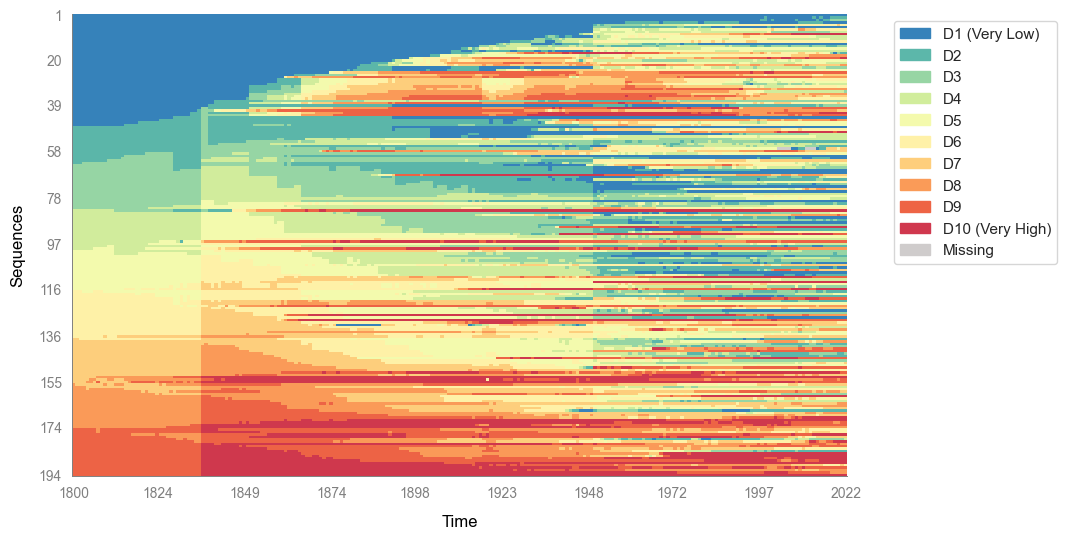

In [14]:
plot_sequence_index(sequence_data, 
                    sort_by="lexicographic",
                    )

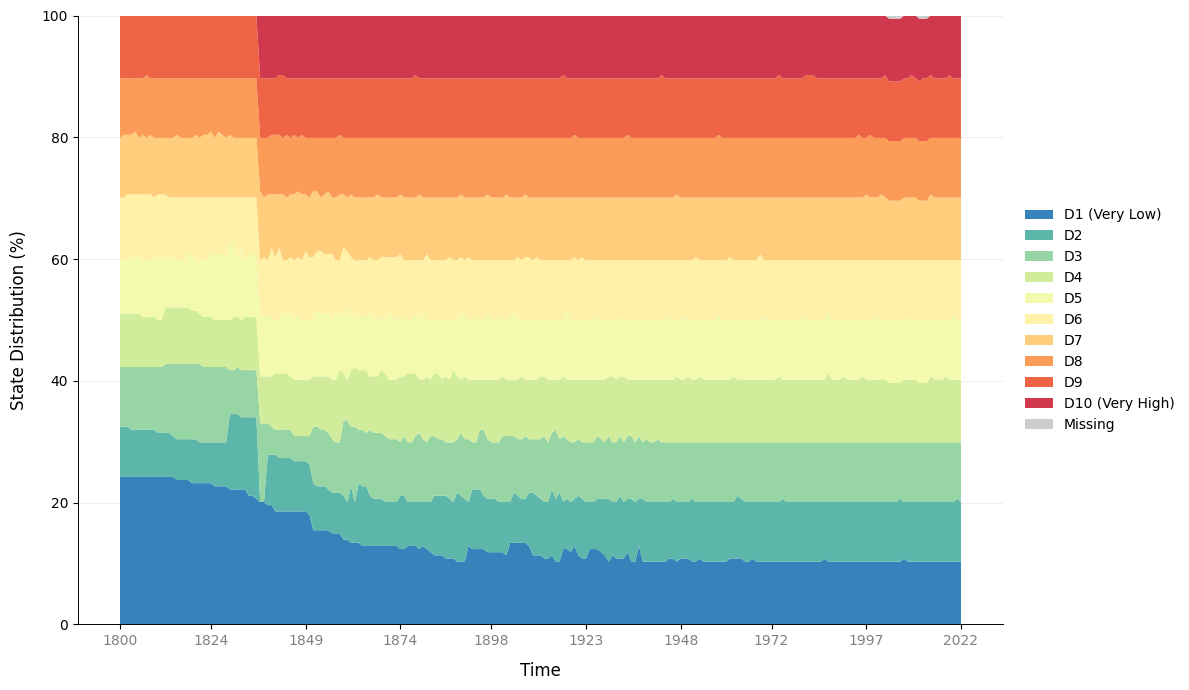

In [4]:
plot_state_distribution(sequence_data)

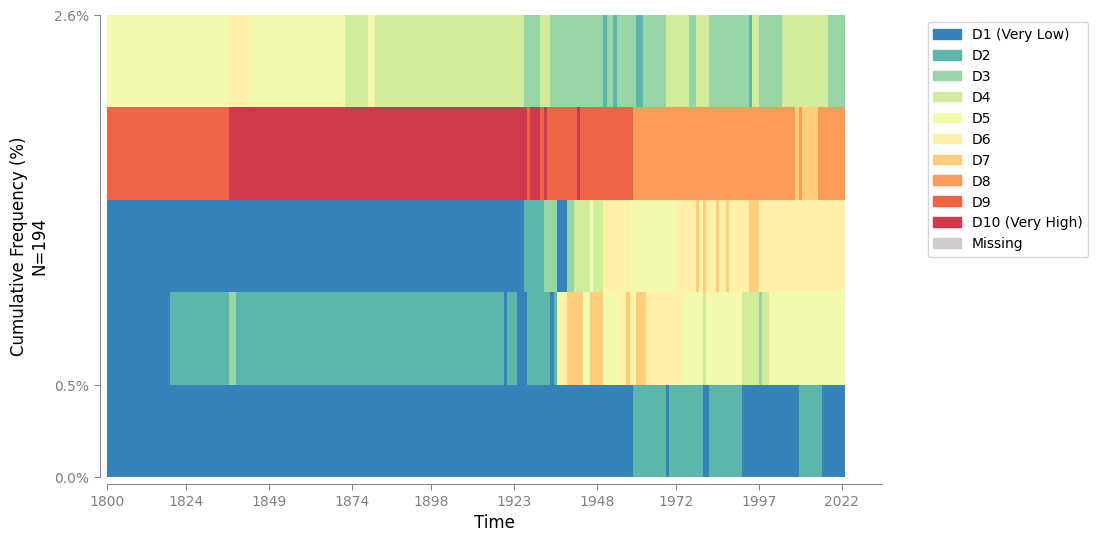

In [5]:
# Note: `plot_most_frequent_sequences` does not divide frequencies evenly; it’s just that in the CO2 dataset, the top-5 sequences happen to have similar frequencies.

plot_most_frequent_sequences(sequence_data, top_n=5)

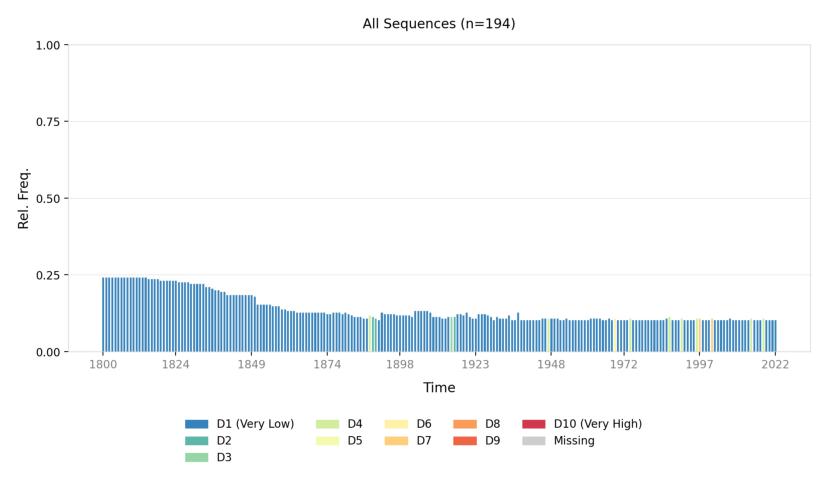

In [6]:
plot_modal_state(sequence_data)

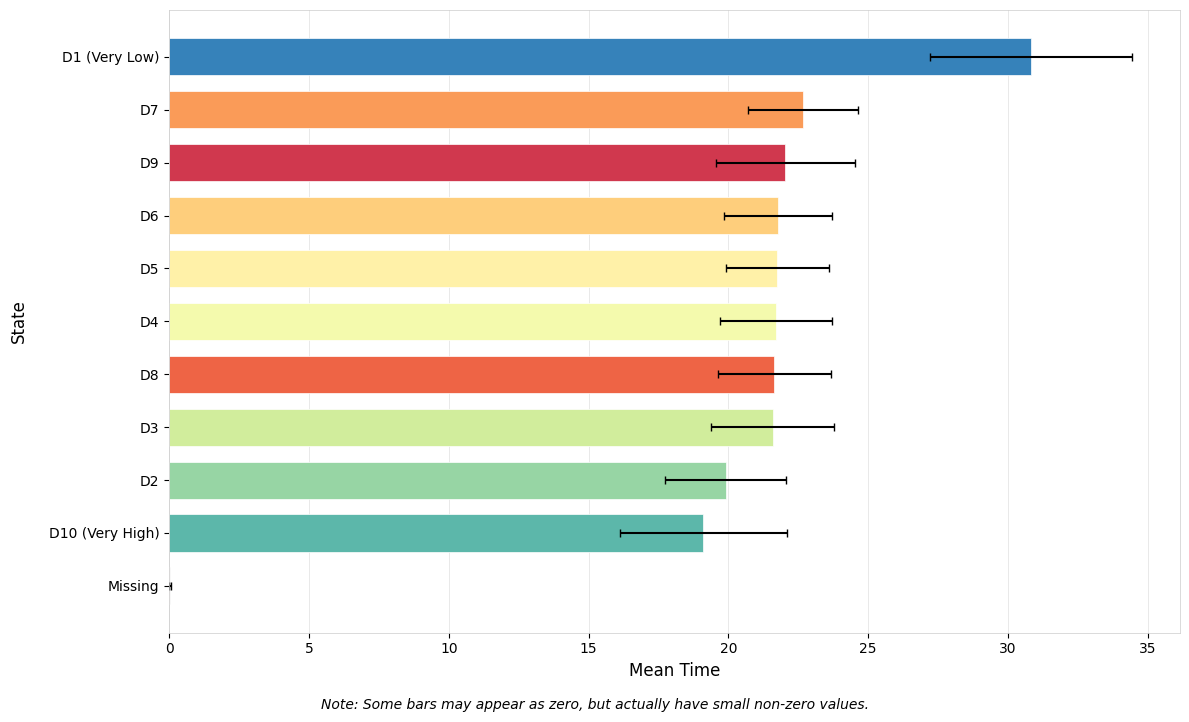

In [7]:
plot_mean_time(sequence_data)

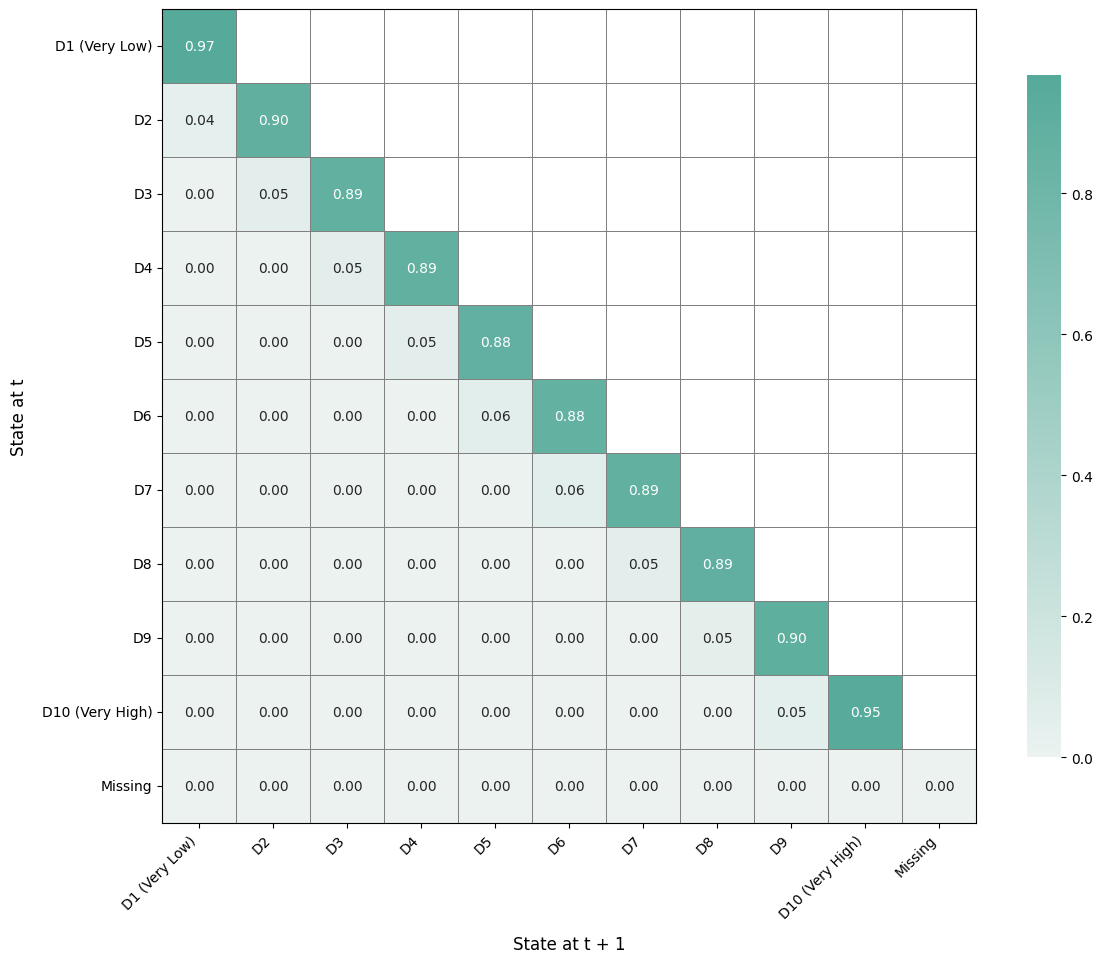

In [8]:
plot_transition_matrix(sequence_data)


In [9]:
# You can also replace "OMspell" with "OM/DHD/HAM" and "TRATE" with "CONSTANT"
om = get_distance_matrix(seqdata=sequence_data,
                         method='OM',
                         sm="CONSTANT",
                         indel=1)
om

[>] Processing 194 sequences with 11 unique states.
  - Creating 12x12 substitution-cost matrix using 2 as constant value
[>] Identified 194 unique sequences.
[>] Starting Optimal Matching(OM)...
[>] Computing all pairwise distances...
[>] Computed Successfully.


,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uganda,Ukraine,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Afghanistan,0.0,324.0,176.0,446.0,436.0,446.0,446.0,314.0,446.0,446.0,...,334.0,344.0,446.0,344.0,414.0,210.0,444.0,330.0,400.0,446.0
Albania,324.0,0.0,328.0,434.0,350.0,366.0,392.0,254.0,446.0,444.0,...,312.0,362.0,342.0,342.0,360.0,330.0,314.0,196.0,384.0,352.0
Algeria,176.0,328.0,0.0,434.0,406.0,330.0,392.0,224.0,446.0,444.0,...,350.0,290.0,308.0,268.0,334.0,162.0,314.0,356.0,416.0,400.0
Andorra,446.0,434.0,434.0,0.0,446.0,392.0,204.0,412.0,156.0,202.0,...,446.0,286.0,418.0,272.0,384.0,348.0,434.0,442.0,154.0,320.0
Angola,436.0,350.0,406.0,446.0,0.0,414.0,434.0,346.0,446.0,446.0,...,288.0,422.0,232.0,422.0,330.0,412.0,204.0,312.0,362.0,344.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,210.0,330.0,162.0,348.0,412.0,346.0,290.0,210.0,368.0,364.0,...,350.0,218.0,370.0,206.0,328.0,0.0,382.0,362.0,318.0,342.0
Vietnam,444.0,314.0,314.0,434.0,204.0,276.0,396.0,308.0,446.0,444.0,...,340.0,396.0,310.0,396.0,236.0,382.0,0.0,344.0,360.0,326.0
Yemen,330.0,196.0,356.0,442.0,312.0,418.0,432.0,348.0,446.0,444.0,...,226.0,362.0,320.0,362.0,364.0,362.0,344.0,0.0,372.0,384.0
Zambia,400.0,384.0,416.0,154.0,362.0,398.0,162.0,376.0,286.0,296.0,...,356.0,262.0,382.0,250.0,268.0,318.0,360.0,372.0,0.0,254.0


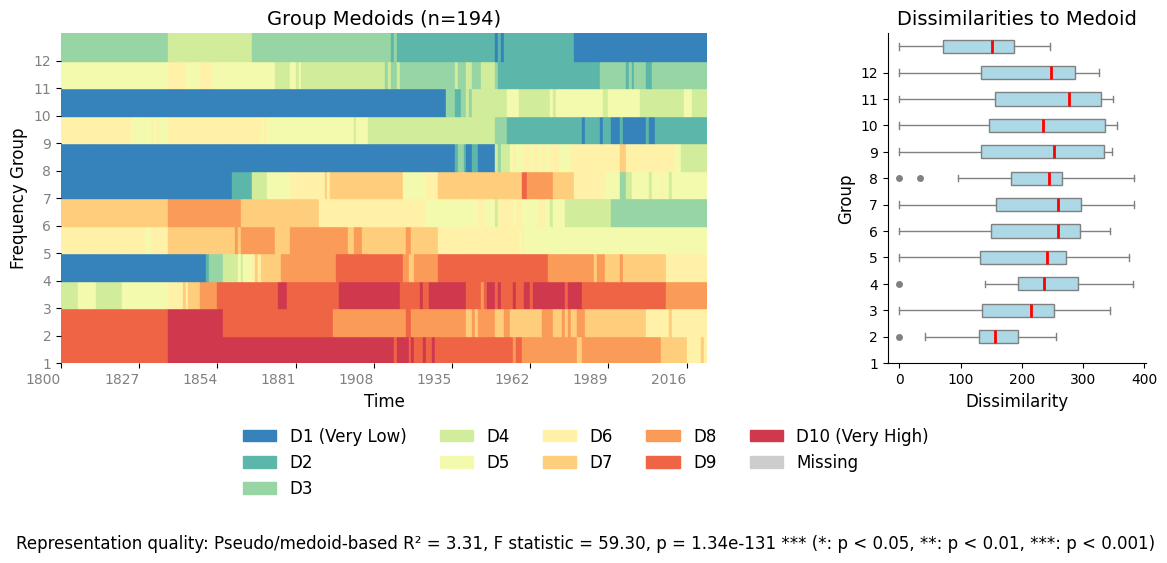

In [10]:
plot_relative_frequency(seqdata=sequence_data, 
                        distance_matrix=om, 
                        num_groups=12, 
                        dpi=200, 
                        # save_as='relative_frequency_plot'
                        )

[>] Converting DataFrame to NumPy array...


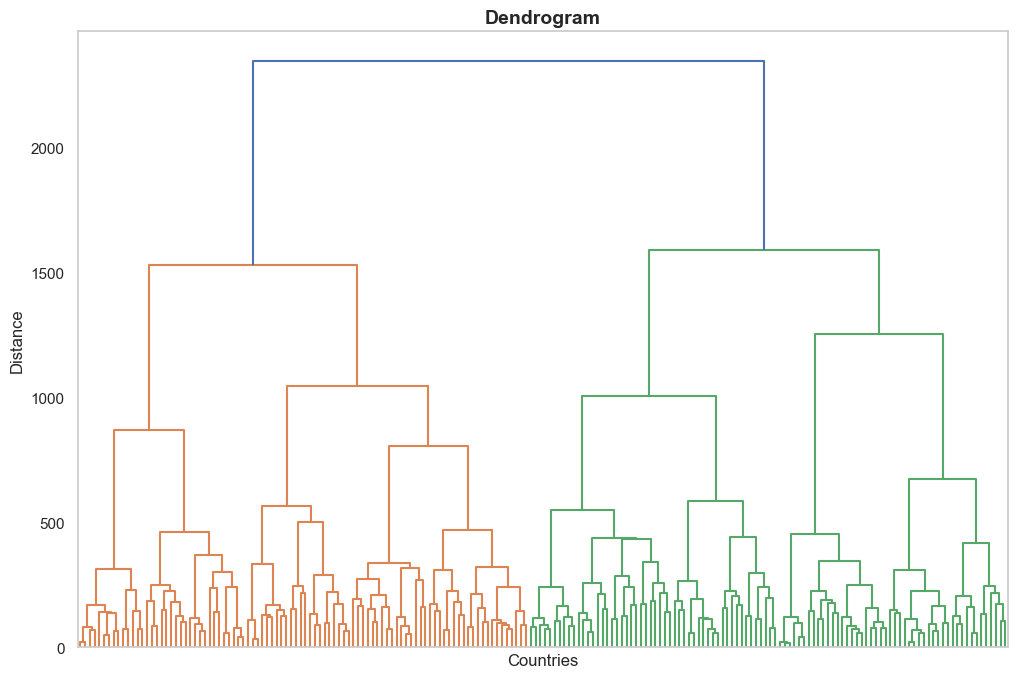

In [11]:
cluster = Cluster(om, sequence_data.ids, clustering_method='ward')
cluster.plot_dendrogram(xlabel="Countries", ylabel="Distance")